
## Признаки
- sender_id	уникальный идентификатор отправителя
- platform_id	id платформы, 6 - декстоп, 7 - мобильная версия
- time_stamp	Дата и время отправки
- gender	Гендер отправителя
- reg_date	Дата регистрации пользователя

## Вопрос
Нужно ли внедрить нововведение для всех или отклонить его?

In [12]:
# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [13]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 0.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [14]:
data = pd.DataFrame.from_csv('../Test/Test_4.csv', sep=';', index_col=None) #данные

In [15]:
print(data.shape)

(768439, 5)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768439 entries, 0 to 768438
Data columns (total 5 columns):
sender_id      768439 non-null int64
platform_id    768439 non-null int64
time_stamp     768439 non-null object
gender         768439 non-null object
reg_date       768439 non-null object
dtypes: int64(2), object(3)
memory usage: 29.3+ MB


In [17]:
data['time_stamp'] = pd.to_datetime(data.time_stamp, yearfirst = True) #изменим тип колонки time_stamp на datetime
data.describe(include = ['datetime'])

,time_stamp
count,768439
unique,20100
top,2017-03-14 14:26:00
freq,239
first,2017-03-13 00:00:00
last,2017-03-27 00:00:00


In [19]:
# выделим недели, дни и часы
data['day'] = data['time_stamp'].dt.day
data['hour'] = data['time_stamp'].dt.hour
data['weekday'] = data['time_stamp'].dt.weekday

In [21]:
# внесем новую колонку 'odd' : четные 0, нечетные - 1
data['odd'] = data['sender_id'] % 2 != 0

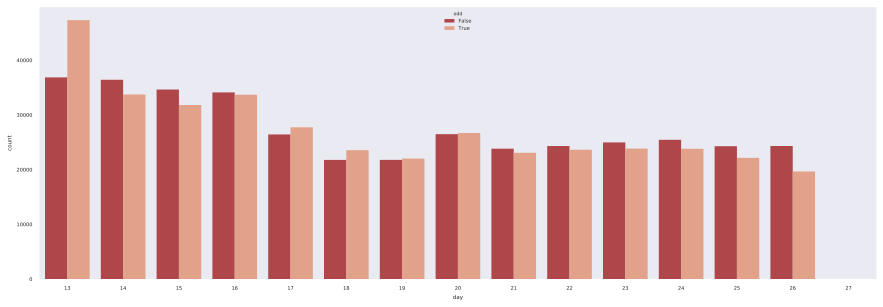

In [25]:
# Посмотрим на активность пользователей с четным и нечетным id после замены сердца на галочку 
sns.countplot(x='day', hue='odd', data = data);

## Вывод
С 24-го наблюдаем довольно стабльное поведение у пользователей, для которых ничего не поменялось (красный столбик) и спад активности у пользователей на которых приняли нововведение. 
Промежуток довольно маленький для окончательного ответа, но предварительеый вывод - _отклонить нововведение_.

## <center> Дополнительные расчеты

In [29]:
odd = data[ data['sender_id'].map(lambda x: x%2 != 0) ] #только нечетные
even = data[ data['sender_id'].map(lambda x: x%2 == 0) ] #только четные

In [32]:
# Посмотрим на отношение активности двух групп пользователей до изменений. Они пока ничем не отличаются, отношение ~ 1
odd_mean = odd[data.time_stamp < '24.03.2017 16:00'].groupby('sender_id').count()['time_stamp'].mean()
even_mean = even[data.time_stamp < '24.03.2017 16:00'].groupby('sender_id').count()['time_stamp'].mean()
odd_mean/even_mean

1.0309543618124

In [33]:
# Отношение активности после изменений отличается, у пользователей с четным id активности больше, что поддиерждает наши догадки
odd_mean_mod = odd[data.time_stamp > '24.03.2017 16:00'].groupby('sender_id').count()['time_stamp'].mean()
even_mean_mod = even[data.time_stamp > '24.03.2017 16:00'].groupby('sender_id').count()['time_stamp'].mean()
odd_mean_mod/even_mean_mod

0.89581278684926957